In [13]:
import os
import json

def procesar_archivos(ruta_carpeta):
  """Procesa archivos .txt en una carpeta, creando un diccionario con su contenido.

  Args:
    ruta_carpeta: La ruta a la carpeta que contiene los archivos .txt.

  Returns:
    Un diccionario donde las claves son los nombres de los archivos y los valores son
    el contenido del archivo si solo contiene '0' o '1', de lo contrario, el valor
    es una cadena con el nombre del archivo y su contenido.
  """

  archivos = {}
  for nombre_archivo in os.listdir(ruta_carpeta):
    if nombre_archivo.endswith(".txt"):
      ruta_completa = os.path.join(ruta_carpeta, nombre_archivo)
      with open(ruta_completa, "r") as archivo:
        contenido = archivo.read().strip()
        if contenido in ("0", "1"):
          archivos[nombre_archivo[:-4]] = int(contenido)
        else:
          #archivos[nombre_archivo] = f"Archivo {nombre_archivo}: {contenido}"
          print(f"Archivo {nombre_archivo}: {contenido}")

  return archivos

# Ejemplo de uso:
ruta_carpeta = "/home/machineLearning/crosswalk_dataset/labels" # Reemplaza con la ruta a tu carpeta
archivos_procesados = procesar_archivos(ruta_carpeta)

# Guarda el diccionario en un archivo JSON
with open("archivos.json", "w") as archivo_json:
  json.dump(archivos_procesados, archivo_json, indent=4)

print("Archivos procesados y guardados en archivos.json")

Archivo test_001548.txt: <
Archivos procesados y guardados en archivos.json


In [14]:
archivos_procesados

{'test_000830': 0,
 'test_000938': 1,
 'test_000121': 0,
 'test_000226': 0,
 'test_003211': 1,
 'test_002632': 1,
 'test_002198': 1,
 'test_000607': 0,
 'test_003109': 1,
 'test_003183': 1,
 'test_002134': 1,
 'test_000796': 0,
 'test_000518': 0,
 'test_001461': 1,
 'test_003125': 1,
 'test_000742': 0,
 'test_001888': 1,
 'test_002479': 1,
 'test_002845': 1,
 'test_000728': 0,
 'test_002629': 1,
 'test_003090': 1,
 'test_002684': 1,
 'test_000329': 0,
 'test_002806': 1,
 'test_000259': 0,
 'test_002844': 1,
 'test_002236': 1,
 'test_001235': 1,
 'test_003155': 1,
 'test_000040': 0,
 'test_000633': 0,
 'test_001173': 1,
 'test_001161': 1,
 'test_002721': 1,
 'test_001672': 1,
 'test_002084': 1,
 'test_000524': 0,
 'test_000809': 0,
 'test_003251': 1,
 'test_001428': 1,
 'test_002921': 1,
 'test_003213': 1,
 'test_000958': 1,
 'test_000489': 0,
 'test_002835': 1,
 'test_000822': 0,
 'test_001893': 1,
 'test_001556': 1,
 'test_001100': 1,
 'test_001204': 1,
 'test_001074': 1,
 'test_00219

In [26]:
img_path='/home/machineLearning/bici.jpg'

# Medir con el modelo 1


0: 640x448 (no detections), 220.4ms
Speed: 51.8ms preprocess, 220.4ms inference, 7.7ms postprocess per image at shape (1, 3, 640, 448)


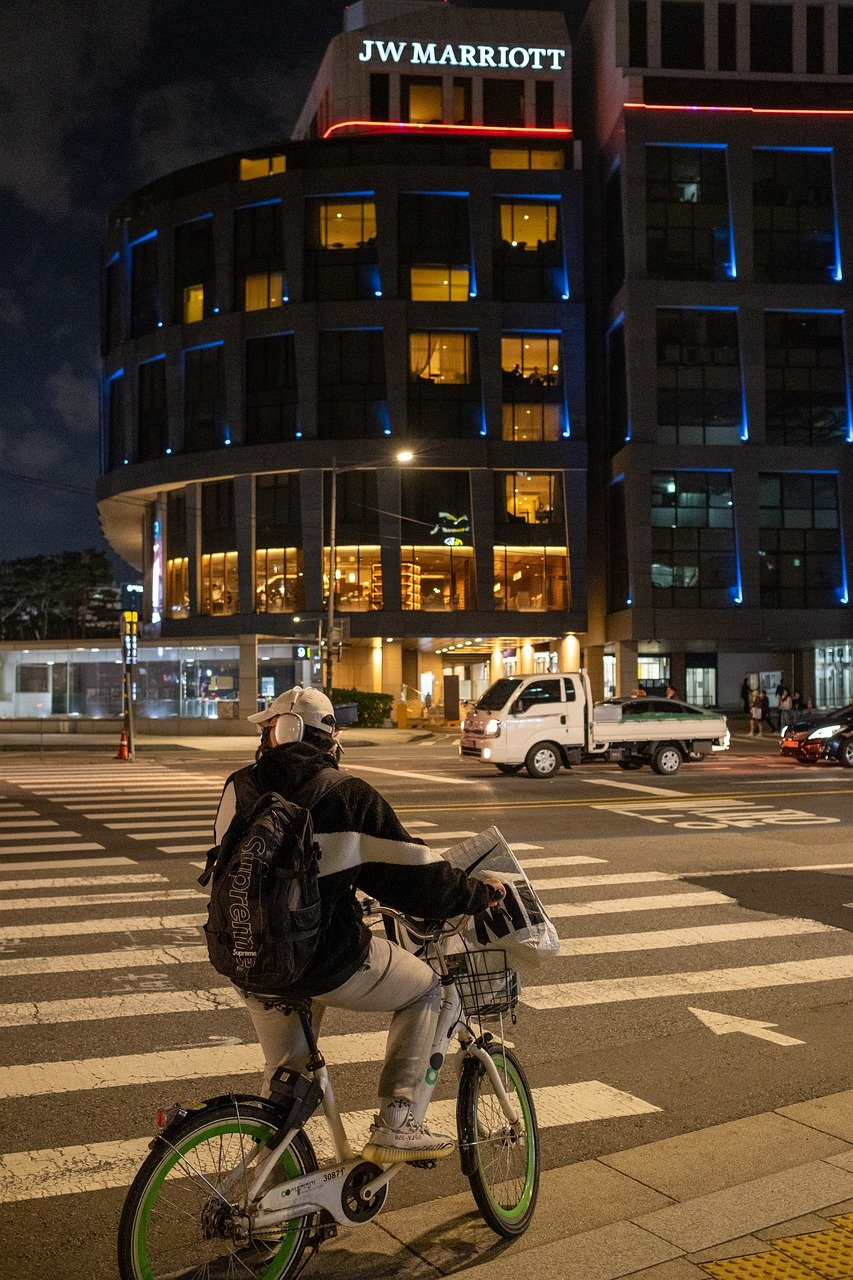

In [27]:
from PIL import Image

from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model = YOLO('/home/machineLearning/peso_modelo_malo/best.pt')

# Run inference on 'bus.jpg'
results = model([img_path])  # results list

# Visualize the results
for i, r in enumerate(results):
    # Plot results image
    im_bgr = r.plot()  # BGR-order numpy array
    im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

    # Show results to screen (in supported environments)
    r.show()

    # Save results to disk
    r.save(filename=f"results{i}.jpg")

In [28]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Cross Walk Pavement-Markings', 1: 'pedestrian-pathway'}
 obb: None
 orig_img: array([[[ 18,  17,  19],
         [ 17,  16,  18],
         [ 18,  18,  18],
         ...,
         [ 61,  59,  59],
         [ 45,  43,  43],
         [ 55,  53,  53]],
 
        [[ 22,  21,  23],
         [ 27,  26,  28],
         [ 32,  32,  32],
         ...,
         [ 53,  50,  52],
         [ 39,  37,  37],
         [ 47,  44,  46]],
 
        [[ 24,  23,  25],
         [ 18,  17,  19],
         [  9,   8,  10],
         ...,
         [ 55,  54,  58],
         [ 47,  46,  48],
         [ 52,  51,  55]],
 
        ...,
 
        [[ 19,  51,  70],
         [ 20,  52,  71],
         [  1,  33,  52],
         ...,
         [ 27,  93, 134],
         [ 27,  91, 132],
         [ 18,  80, 121]],
 
        [[ 31,  62,  83],
         [ 14,  45,  66],
         [ 

In [29]:
box=results[0].boxes
box

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([], device='cuda:0')
conf: tensor([], device='cuda:0')
data: tensor([], device='cuda:0', size=(0, 6))
id: None
is_track: False
orig_shape: (1280, 853)
shape: torch.Size([0, 6])
xywh: tensor([], device='cuda:0', size=(0, 4))
xywhn: tensor([], device='cuda:0', size=(0, 4))
xyxy: tensor([], device='cuda:0', size=(0, 4))
xyxyn: tensor([], device='cuda:0', size=(0, 4))

In [30]:
probs=box.conf.tolist()
max(probs)

ValueError: max() arg is an empty sequence

In [23]:
from PIL import Image

from ultralytics import YOLO

In [24]:
    
# Load a pretrained YOLOv8n model 1
model_1= YOLO('/home/machineLearning/peso_modelo_malo/best.pt')

# Load a pretrained YOLOv8n model 2
model_2 = YOLO('/home/machineLearning/pesos/crosswalks.pt')

In [38]:
imgs_path='/home/machineLearning/medir_accurancy_de_los_dos/test'

In [39]:
def get_probs(predict)->float:
    box=predict[0].boxes
    probs=box.conf.tolist()
    if len(probs)<1:
        return 0
    return max(probs)

In [40]:
ruta_carpeta=imgs_path

In [42]:
i=0
res=[]
for nombre_archivo in os.listdir(imgs_path):
    i+=1
    if i>500:
      break
    if nombre_archivo.endswith(".jpg"):
      ruta_completa = os.path.join(ruta_carpeta, nombre_archivo)
      name=nombre_archivo[:-4]
      if not name in archivos_procesados:
        print(f'El archivo {name} no esta en el diccionario')
        continue
      real=archivos_procesados[name]
      
      predict_1=model_1([ruta_completa])
      
      probs_1=get_probs(predict_1)
      predict_2=model_2([ruta_completa])
      probs_2=get_probs(predict_2)
      
      
      a={'name':name,'real':real,'probs_1':probs_1,'probs_2':probs_2}
      res.append(a)
      
      




0: 640x448 (no detections), 60.0ms
Speed: 5.8ms preprocess, 60.0ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 448)

0: 512x352 (no detections), 157.2ms
Speed: 4.5ms preprocess, 157.2ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 352)

0: 640x480 (no detections), 46.8ms
Speed: 4.1ms preprocess, 46.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)

0: 512x384 (no detections), 61.3ms
Speed: 4.4ms preprocess, 61.3ms inference, 2.2ms postprocess per image at shape (1, 3, 512, 384)

0: 448x640 (no detections), 29.2ms
Speed: 6.8ms preprocess, 29.2ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)

0: 352x512 (no detections), 25.7ms
Speed: 1.9ms preprocess, 25.7ms inference, 0.9ms postprocess per image at shape (1, 3, 352, 512)

0: 448x640 (no detections), 18.1ms
Speed: 1.9ms preprocess, 18.1ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

0: 352x512 (no detections), 48.9ms
Speed: 2.6ms preprocess, 48.9ms

In [55]:
import pandas as pd

def array_a_dataframe_y_serializar(array_de_diccionarios, nombre_archivo):
  """Convierte un array de diccionarios a un DataFrame y lo serializa.

  Args:
    array_de_diccionarios: El array de diccionarios a convertir.
    nombre_archivo: El nombre del archivo para guardar el DataFrame serializado.
  """

  df = pd.DataFrame(array_de_diccionarios)
  df.to_csv(nombre_archivo, index=False)
  return df

# Ejemplo de uso:
array_de_diccionarios =res

nombre_archivo = "datos_entre_los_dos_modelos.csv"
df=array_a_dataframe_y_serializar(array_de_diccionarios, nombre_archivo)

print(f"DataFrame serializado en {nombre_archivo}")

DataFrame serializado en datos_entre_los_dos_modelos.csv


In [56]:
df.head()

,name,real,probs_1,probs_2
0,test_000229,0,0.000000,0.000000
1,test_000803,0,0.000000,0.000000
2,test_000782,0,0.000000,0.000000
3,test_000350,0,0.000000,0.000000
4,test_000866,1,0.983648,0.962187


In [57]:
import pandas as pd

def crear_dataframe_booleano(df, columnas):
  """Crea un nuevo DataFrame con las columnas especificadas, donde los valores
  son True si son mayores que cero y False si son iguales a cero.

  Args:
    df: El DataFrame original.
    columnas: Lista de nombres de columnas para incluir en el nuevo DataFrame.

  Returns:
    Un nuevo DataFrame con las columnas especificadas y valores booleanos.
  """

  nuevo_df = df[columnas].copy()
  for columna in columnas:
    nuevo_df[columna] = nuevo_df[columna] > 0

  return nuevo_df

# Ejemplo de uso:


columnas_a_convertir = ['real'	,'probs_1',	'probs_2']
nuevo_df = crear_dataframe_booleano(df, columnas_a_convertir)
print(nuevo_df)

      real  probs_1  probs_2
0    False    False    False
1    False    False    False
2    False    False    False
3    False    False    False
4     True     True     True
..     ...      ...      ...
248  False    False    False
249  False    False    False
250  False     True    False
251  False    False    False
252  False     True    False

[253 rows x 3 columns]


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, precision_recall_curve, precision_score, recall_score, f1_score

,name,real,probs_1,probs_2
0,test_000229,0,0.000000,0.000000
1,test_000803,0,0.000000,0.000000
2,test_000782,0,0.000000,0.000000
3,test_000350,0,0.000000,0.000000
4,test_000866,1,0.983648,0.962187
...,...,...,...,...
248,test_000302,0,0.000000,0.000000
249,test_000692,0,0.000000,0.000000
250,test_000138,0,0.297934,0.000000
251,test_000809,0,0.000000,0.000000


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, precision_recall_curve, precision_score, recall_score, f1_score


In [69]:
def metrics_(y_true,y_pred,model_name:str):




    # Estadísticas
    print("Reporte de Clasificación:")
    print(classification_report(y_true, y_pred))

    print("Matriz de Confusión:")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    accuracy = accuracy_score(y_true, y_pred)
    print(f"Exactitud: {accuracy}")

    # Convertir matriz de confusión a un DataFrame para usar con seaborn
    cm_df = pd.DataFrame(cm, index=['No Crosswalk', 'Crosswalk'], columns=['Pred. No Crosswalk', 'Pred. crosswalk'])

    # Graficar la Matriz de Confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
    plt.title('Matriz de Confusión')
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Verdadera')
    plt.show()

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show()

    # Curva Precision-Recall
    precision, recall, _ = precision_recall_curve(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Curva Precision-Recall')
    plt.show()

    # Gráfico de Precisión por Clase
    precision_no_cruzar = precision_score(y_true, y_pred, pos_label=0)
    precision_cruzar = precision_score(y_true, y_pred, pos_label=1)
    recall_no_cruzar = recall_score(y_true, y_pred, pos_label=0)
    recall_cruzar = recall_score(y_true, y_pred, pos_label=1)
    f1_no_cruzar = f1_score(y_true, y_pred, pos_label=0)
    f1_cruzar = f1_score(y_true, y_pred, pos_label=1)

    metrics = {
        'Clase': ['No Crosswalk', 'Crosswalk'],
        'Precisión': [precision_no_cruzar, precision_cruzar],
        'Recall': [recall_no_cruzar, recall_cruzar],
        'F1-Score': [f1_no_cruzar, f1_cruzar]
    }

    metrics_df = pd.DataFrame(metrics)

    # Graficar Precisión, Recall y F1-Score por Clase
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    sns.barplot(x='Clase', y='Precisión', data=metrics_df, ax=ax[0])
    sns.barplot(x='Clase', y='Recall', data=metrics_df, ax=ax[1])
    sns.barplot(x='Clase', y='F1-Score', data=metrics_df, ax=ax[2])

    ax[0].set_title('Precisión por Clase')
    ax[1].set_title('Recall por Clase')
    ax[2].set_title('F1-Score por Clase')
    
    plt.tight_layout()
    plt.show()
    
    # Normalizar la matriz de confusión
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Convertir la matriz de confusión normalizada a un DataFrame para usar con seaborn
    cm_normalized_df = pd.DataFrame(cm_normalized, index=['No cruzar', 'Cruzar'], columns=['Pred. No cruzar', 'Pred. Cruzar'])
    
    # Graficar la Matriz de Confusión Normalizada
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_normalized_df, annot=True, fmt='.2f', cmap='Blues')
    plt.title('Matriz de Confusión Normalizada')
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Verdadera')
    plt.show()
        
    metrics_df.to_csv(f'metrics_{model_name}.csv',index=False)
    

# El 1er model

Reporte de Clasificación:
              precision    recall  f1-score   support

       False       1.00      0.66      0.79       215
        True       0.34      1.00      0.51        38

    accuracy                           0.71       253
   macro avg       0.67      0.83      0.65       253
weighted avg       0.90      0.71      0.75       253

Matriz de Confusión:
[[141  74]
 [  0  38]]
Exactitud: 0.7075098814229249


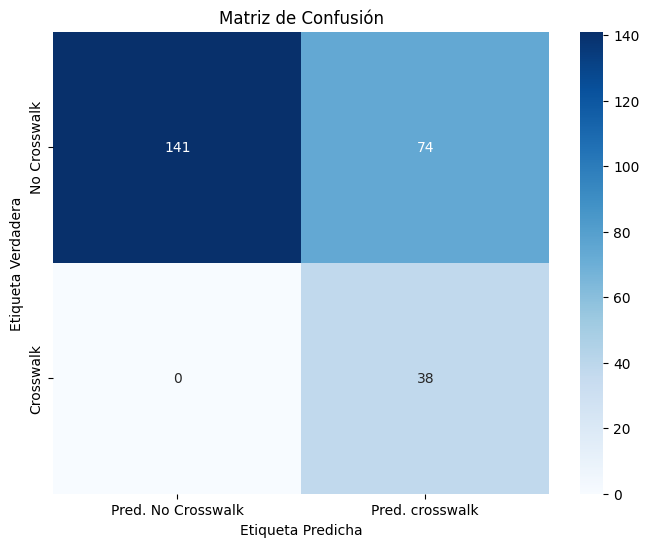

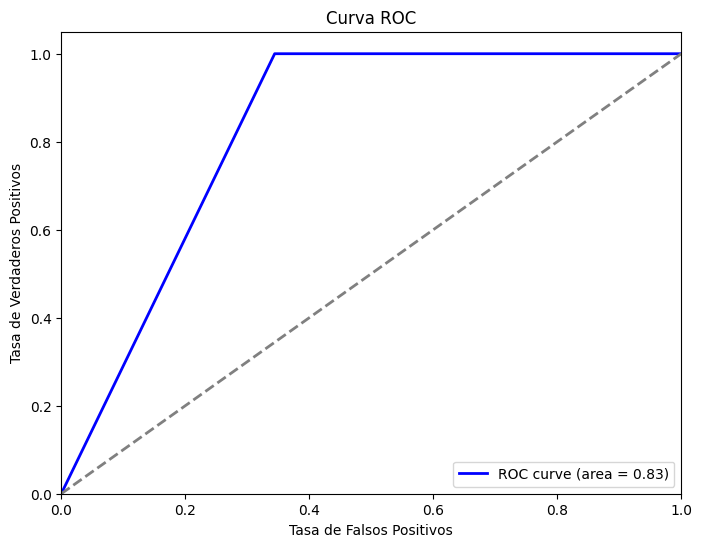

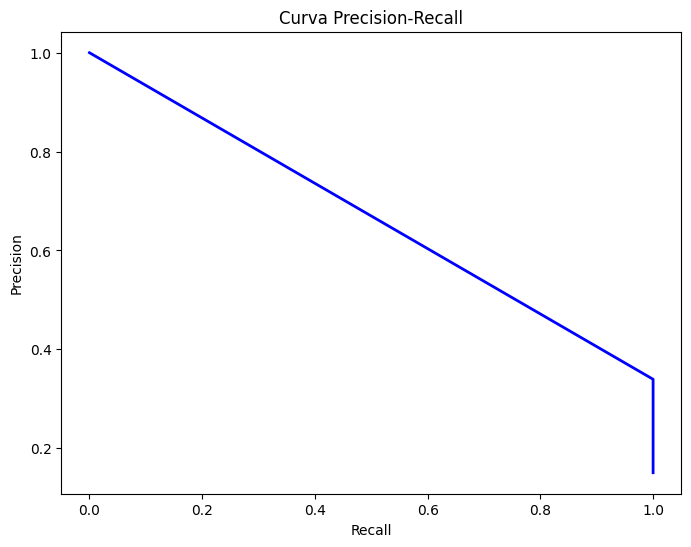

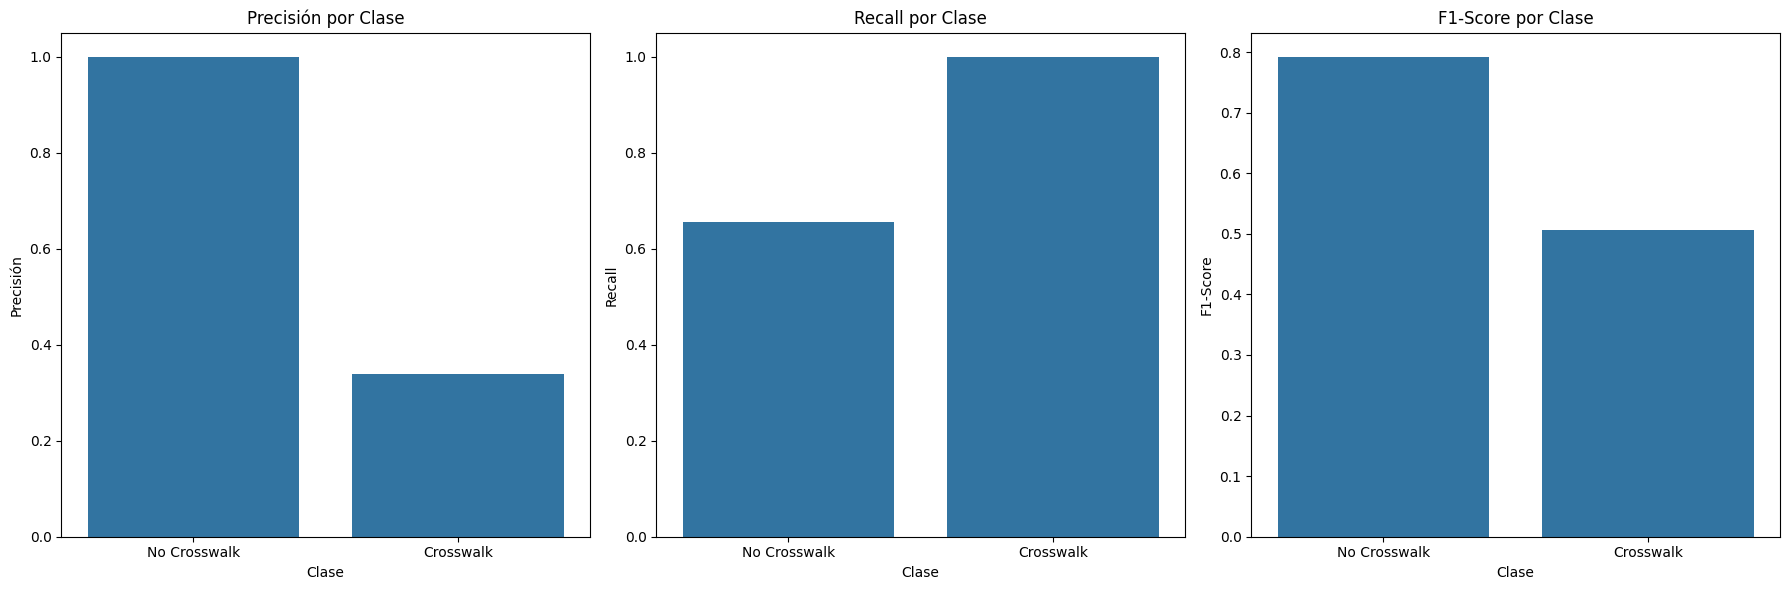

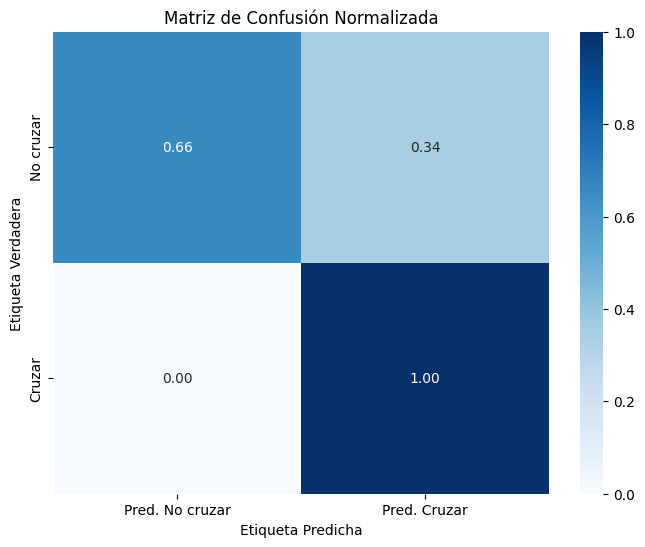

In [70]:
metrics_(nuevo_df['real'],nuevo_df['probs_1'],'model_1')

# Model 2

Reporte de Clasificación:
              precision    recall  f1-score   support

       False       1.00      0.94      0.97       215
        True       0.76      1.00      0.86        38

    accuracy                           0.95       253
   macro avg       0.88      0.97      0.92       253
weighted avg       0.96      0.95      0.96       253

Matriz de Confusión:
[[203  12]
 [  0  38]]
Exactitud: 0.9525691699604744


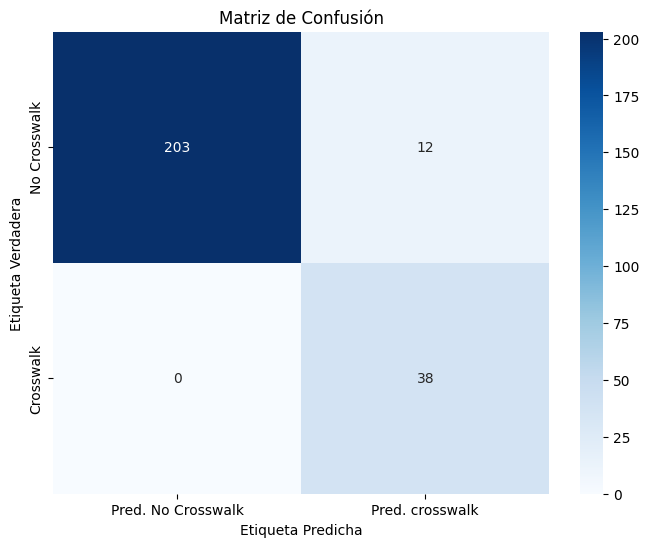

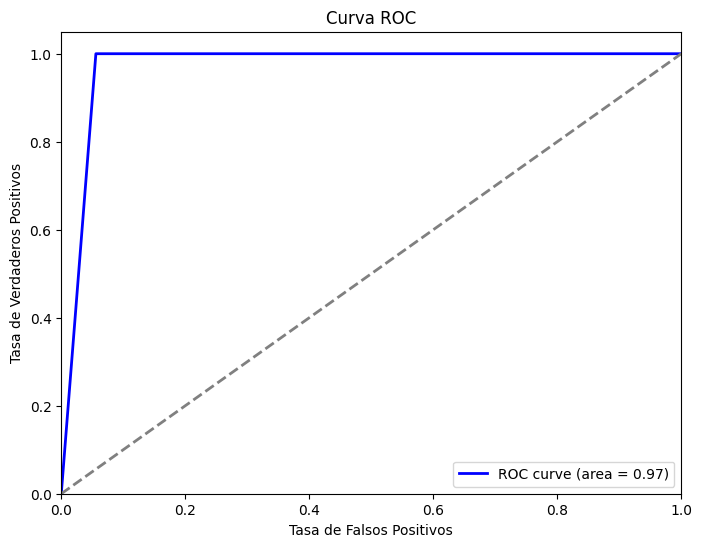

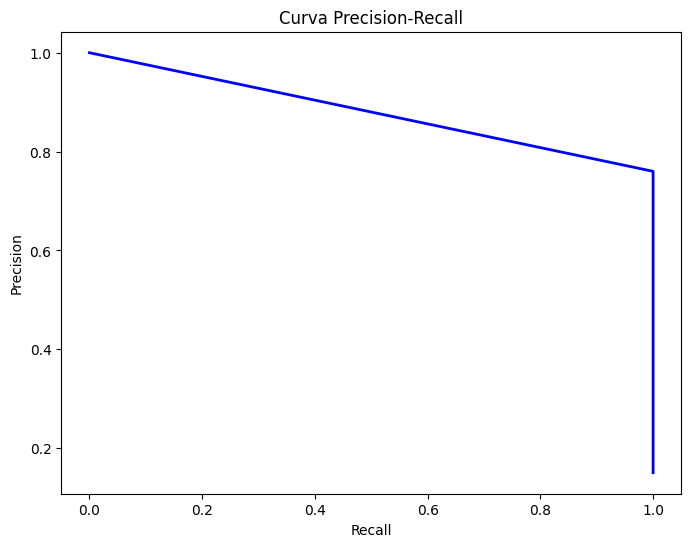

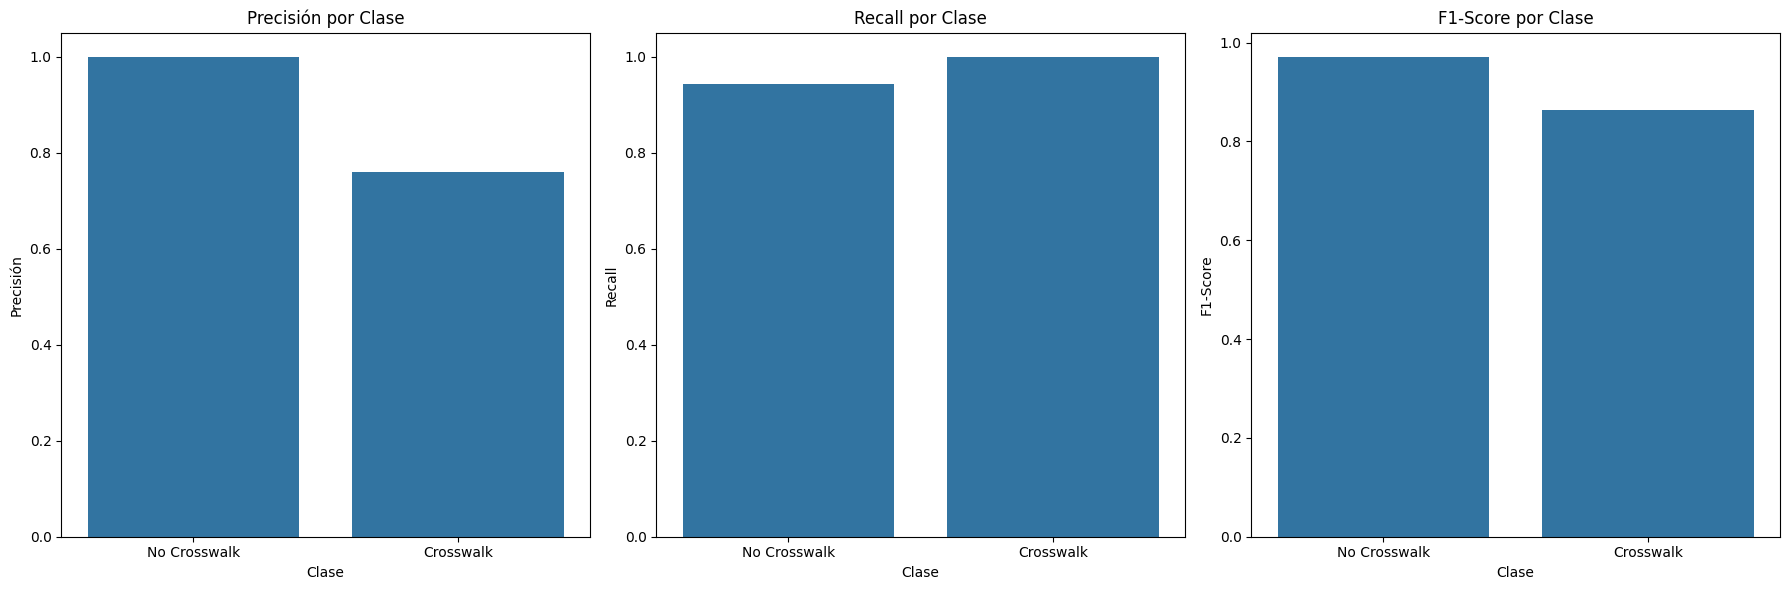

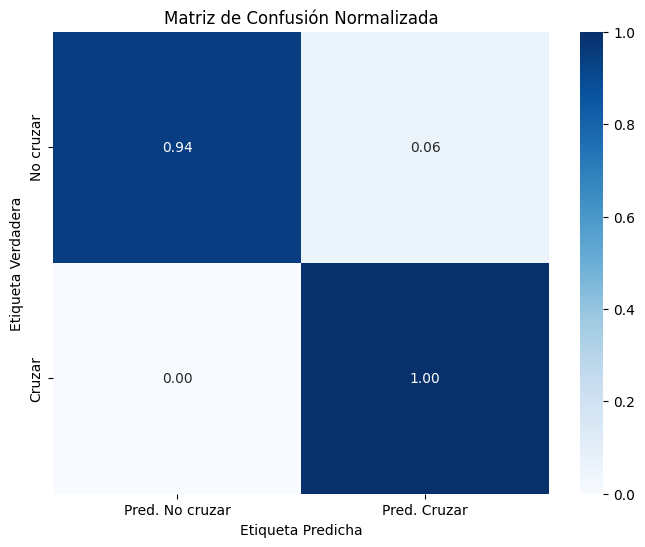

In [71]:
metrics_(nuevo_df['real'],nuevo_df['probs_2'],'Model_2')